In [12]:
import sys
sys.path.append('..\\utils')

In [13]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from MiguelTK import *

In [14]:
df = pd.read_csv('data/HR_capstone_dataset.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [16]:
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
585,0.40,0.51,2,139,3,0,1,0,support,low
10543,0.15,0.92,5,164,3,0,0,0,sales,medium
729,0.09,0.83,6,282,4,0,1,0,technical,medium
13080,0.87,0.71,4,157,2,0,0,0,hr,medium
14893,0.11,0.90,6,253,4,0,1,0,sales,medium


In [17]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  delta                  14999 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 1.3+ MB


# Contexto

<Axes: xlabel='satisfaction_level', ylabel='Count'>

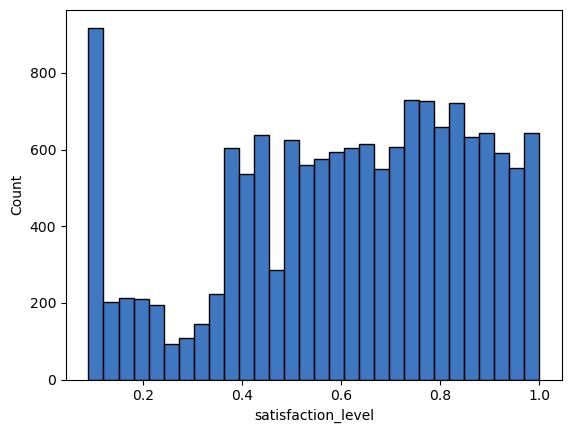

In [18]:
sns.histplot(
    data = df,
    x = 'satisfaction_level',
    color = palette[0]
)

In [19]:
df['satisfaction_level'].mean()

0.6128335222348156

<Axes: xlabel='average_montly_hours', ylabel='Count'>

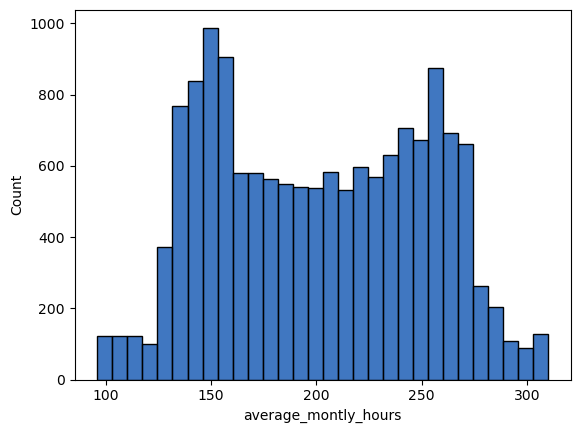

In [20]:
sns.histplot(
    data = df,
    x = 'average_montly_hours',
    color = palette[0]
)

C:\Users\micha\AppData\Local\Temp\ipykernel_31116\4107153204.py:1: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


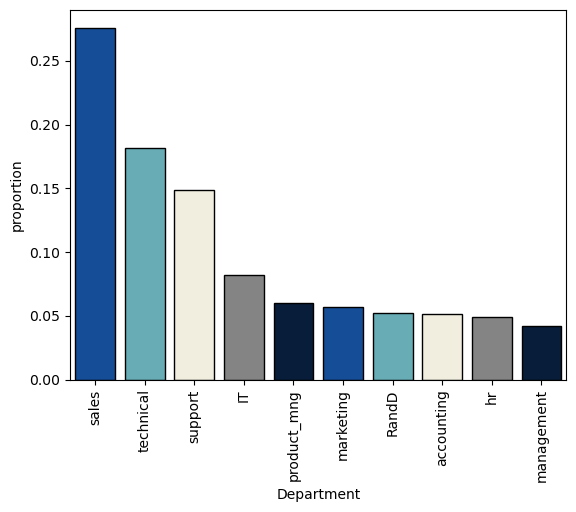

In [21]:
sns.barplot(
    data = df['Department'].value_counts(normalize=True).to_frame(),
    x = 'Department',
    y = 'proportion',
    hue = 'Department',
    **kwargs
)
rot_show()

C:\Users\micha\AppData\Local\Temp\ipykernel_31116\2066820182.py:1: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


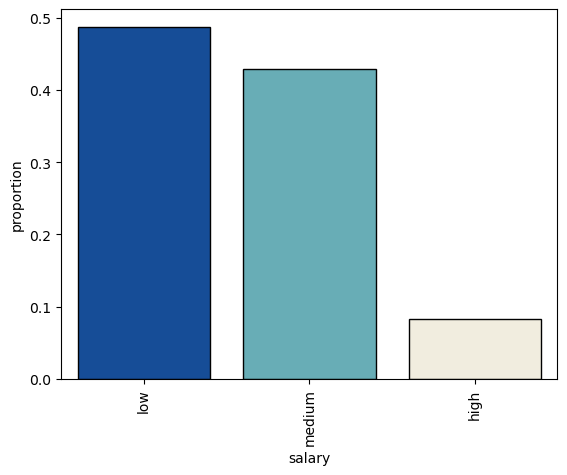

In [22]:
sns.barplot(
    data = df['salary'].value_counts(normalize=True).to_frame(),
    x = 'salary',
    y = 'proportion',
    hue = 'salary',
    **kwargs
)
rot_show()

In [33]:
df['delta'] = df['satisfaction_level'] - df['last_evaluation']

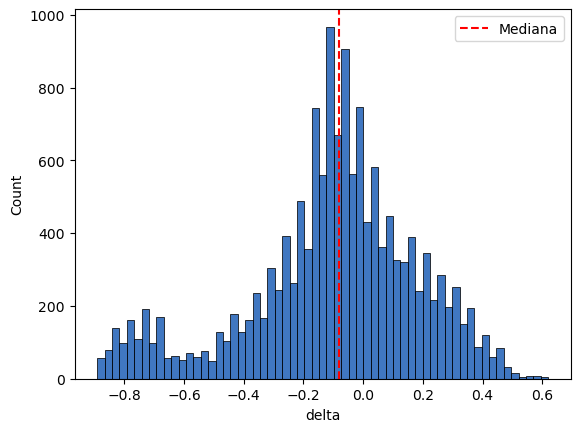

In [39]:
sns.histplot(
    data = df,
    x = 'delta',
    color = palette[0]
)
plt.axvline(df['delta'].median(),color='red',ls='--',label='Mediana')
plt.legend()

In [35]:
df['delta'].mean()

-0.10326821788119209